In [1]:
from os import listdir

In [2]:
from glob import glob

In [3]:
import cv2

ImportError: DLL load failed while importing cv2: The specified module could not be found.

In [5]:
import time

In [6]:
from tqdm import tqdm

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

In [10]:
from skimage.exposure import cumulative_distribution

In [11]:
from skimage.io import imread

In [12]:
from skimage.color import rgb2gray

In [13]:
from SimpleITK import ReadImage, Cast, sitkInt8, sitkFloat64

In [14]:
from SimpleITK import CannyEdgeDetection, GetArrayFromImage

In [15]:
from PIL import Image

In [16]:
from skimage.io import imread, imshow, show

In [17]:
import scipy.fftpack as fftp

In [18]:
from scipy import ndimage, misc, signal

In [19]:
from skimage import data, img_as_float

In [20]:
from skimage.transform import rescale

In [21]:
import tensorflow as tf

In [22]:
from tensorflow.keras.models import Model

In [23]:
from tensorflow.keras.layers import *

In [24]:
from tensorflow.keras.optimizers import Adam

In [25]:
from tensorflow.keras.initializers import random_normal

In [26]:
from tensorflow.keras.regularizers import L2

In [27]:
from tensorflow.keras.metrics import MeanSquaredError

In [28]:
from tensorflow.io import read_file, decode_jpeg

In [29]:
from tensorflow.image import resize

In [30]:
from tensorflow.keras.losses import mean_squared_error

In [31]:
haze_path = "./Dataset/Haze/"

In [32]:
haze_file_names_with_path_image_list = glob(haze_path+"*.jpg")

In [33]:
haze_file_names_with_path_image_list

['./Dataset/Haze\\0468_1_0.12.jpg',
 './Dataset/Haze\\0468_1_0.16.jpg',
 './Dataset/Haze\\0468_1_0.2.jpg',
 './Dataset/Haze\\0469_0.85_0.04.jpg',
 './Dataset/Haze\\0469_0.85_0.06.jpg',
 './Dataset/Haze\\0469_0.85_0.08.jpg',
 './Dataset/Haze\\0469_0.85_0.1.jpg',
 './Dataset/Haze\\0469_0.85_0.12.jpg',
 './Dataset/Haze\\0469_0.85_0.16.jpg',
 './Dataset/Haze\\0469_0.85_0.2.jpg',
 './Dataset/Haze\\0469_0.8_0.04.jpg',
 './Dataset/Haze\\0469_0.8_0.06.jpg',
 './Dataset/Haze\\0469_0.8_0.08.jpg',
 './Dataset/Haze\\0469_0.8_0.1.jpg',
 './Dataset/Haze\\0469_0.8_0.12.jpg',
 './Dataset/Haze\\0469_0.8_0.16.jpg',
 './Dataset/Haze\\0469_0.8_0.2.jpg',
 './Dataset/Haze\\0469_0.95_0.04.jpg',
 './Dataset/Haze\\0469_0.95_0.06.jpg',
 './Dataset/Haze\\0469_0.95_0.08.jpg',
 './Dataset/Haze\\0469_0.95_0.1.jpg',
 './Dataset/Haze\\0469_0.95_0.12.jpg',
 './Dataset/Haze\\0469_0.95_0.16.jpg',
 './Dataset/Haze\\0469_0.95_0.2.jpg',
 './Dataset/Haze\\0469_0.9_0.04.jpg',
 './Dataset/Haze\\0469_0.9_0.06.jpg',
 './Dataset

In [34]:
dehaze_path = "./Dataset/De-hazed/"

In [35]:
dehaze_file_names_with_path_image_list = glob(dehaze_path+"*.jpg")

In [36]:
def get_histogram_matching(arr, xp, fp, clr_max=256):
    interp_out = np.interp(arr, xp, np.arange(clr_max))   
    pixel_result = {i:interp_out[i] for i in range(clr_max)} 
    mp = np.arange(0,clr_max)
    for (k, v) in pixel_result.items():
        mp[k] = v
    s = fp.shape
    fp = np.reshape(mp[fp.ravel()], fp.shape)
    imp = np.reshape(fp, s)
    return fp

In [37]:
def get_cumulative_distribution(im):
    c, b = cumulative_distribution(im)
    for i in range(b[0]):
        c = np.insert(c, 0, 0)
    for i in range(b[-1]+1, 256):
        c = np.append(c, 1)
    return c

In [38]:
rnd_value = np.random.randint(1,10)

In [39]:
rnd_value

3

In [40]:
img1 = imread(haze_file_names_with_path_image_list[rnd_value]).astype(np.uint8)

In [41]:
img2 = imread(haze_file_names_with_path_image_list[rnd_value])

In [42]:
print(np.max(img1), np.max(img2))

255 255


In [43]:
imga = np.zeros(img1.shape).astype(np.uint8)

In [44]:
for i in range(3):
    cd1 = get_cumulative_distribution(img1[...,i])
    cd2 = get_cumulative_distribution(img2[...,i])
    imga[...,i] = get_histogram_matching(cd1, cd2, img1[...,i])

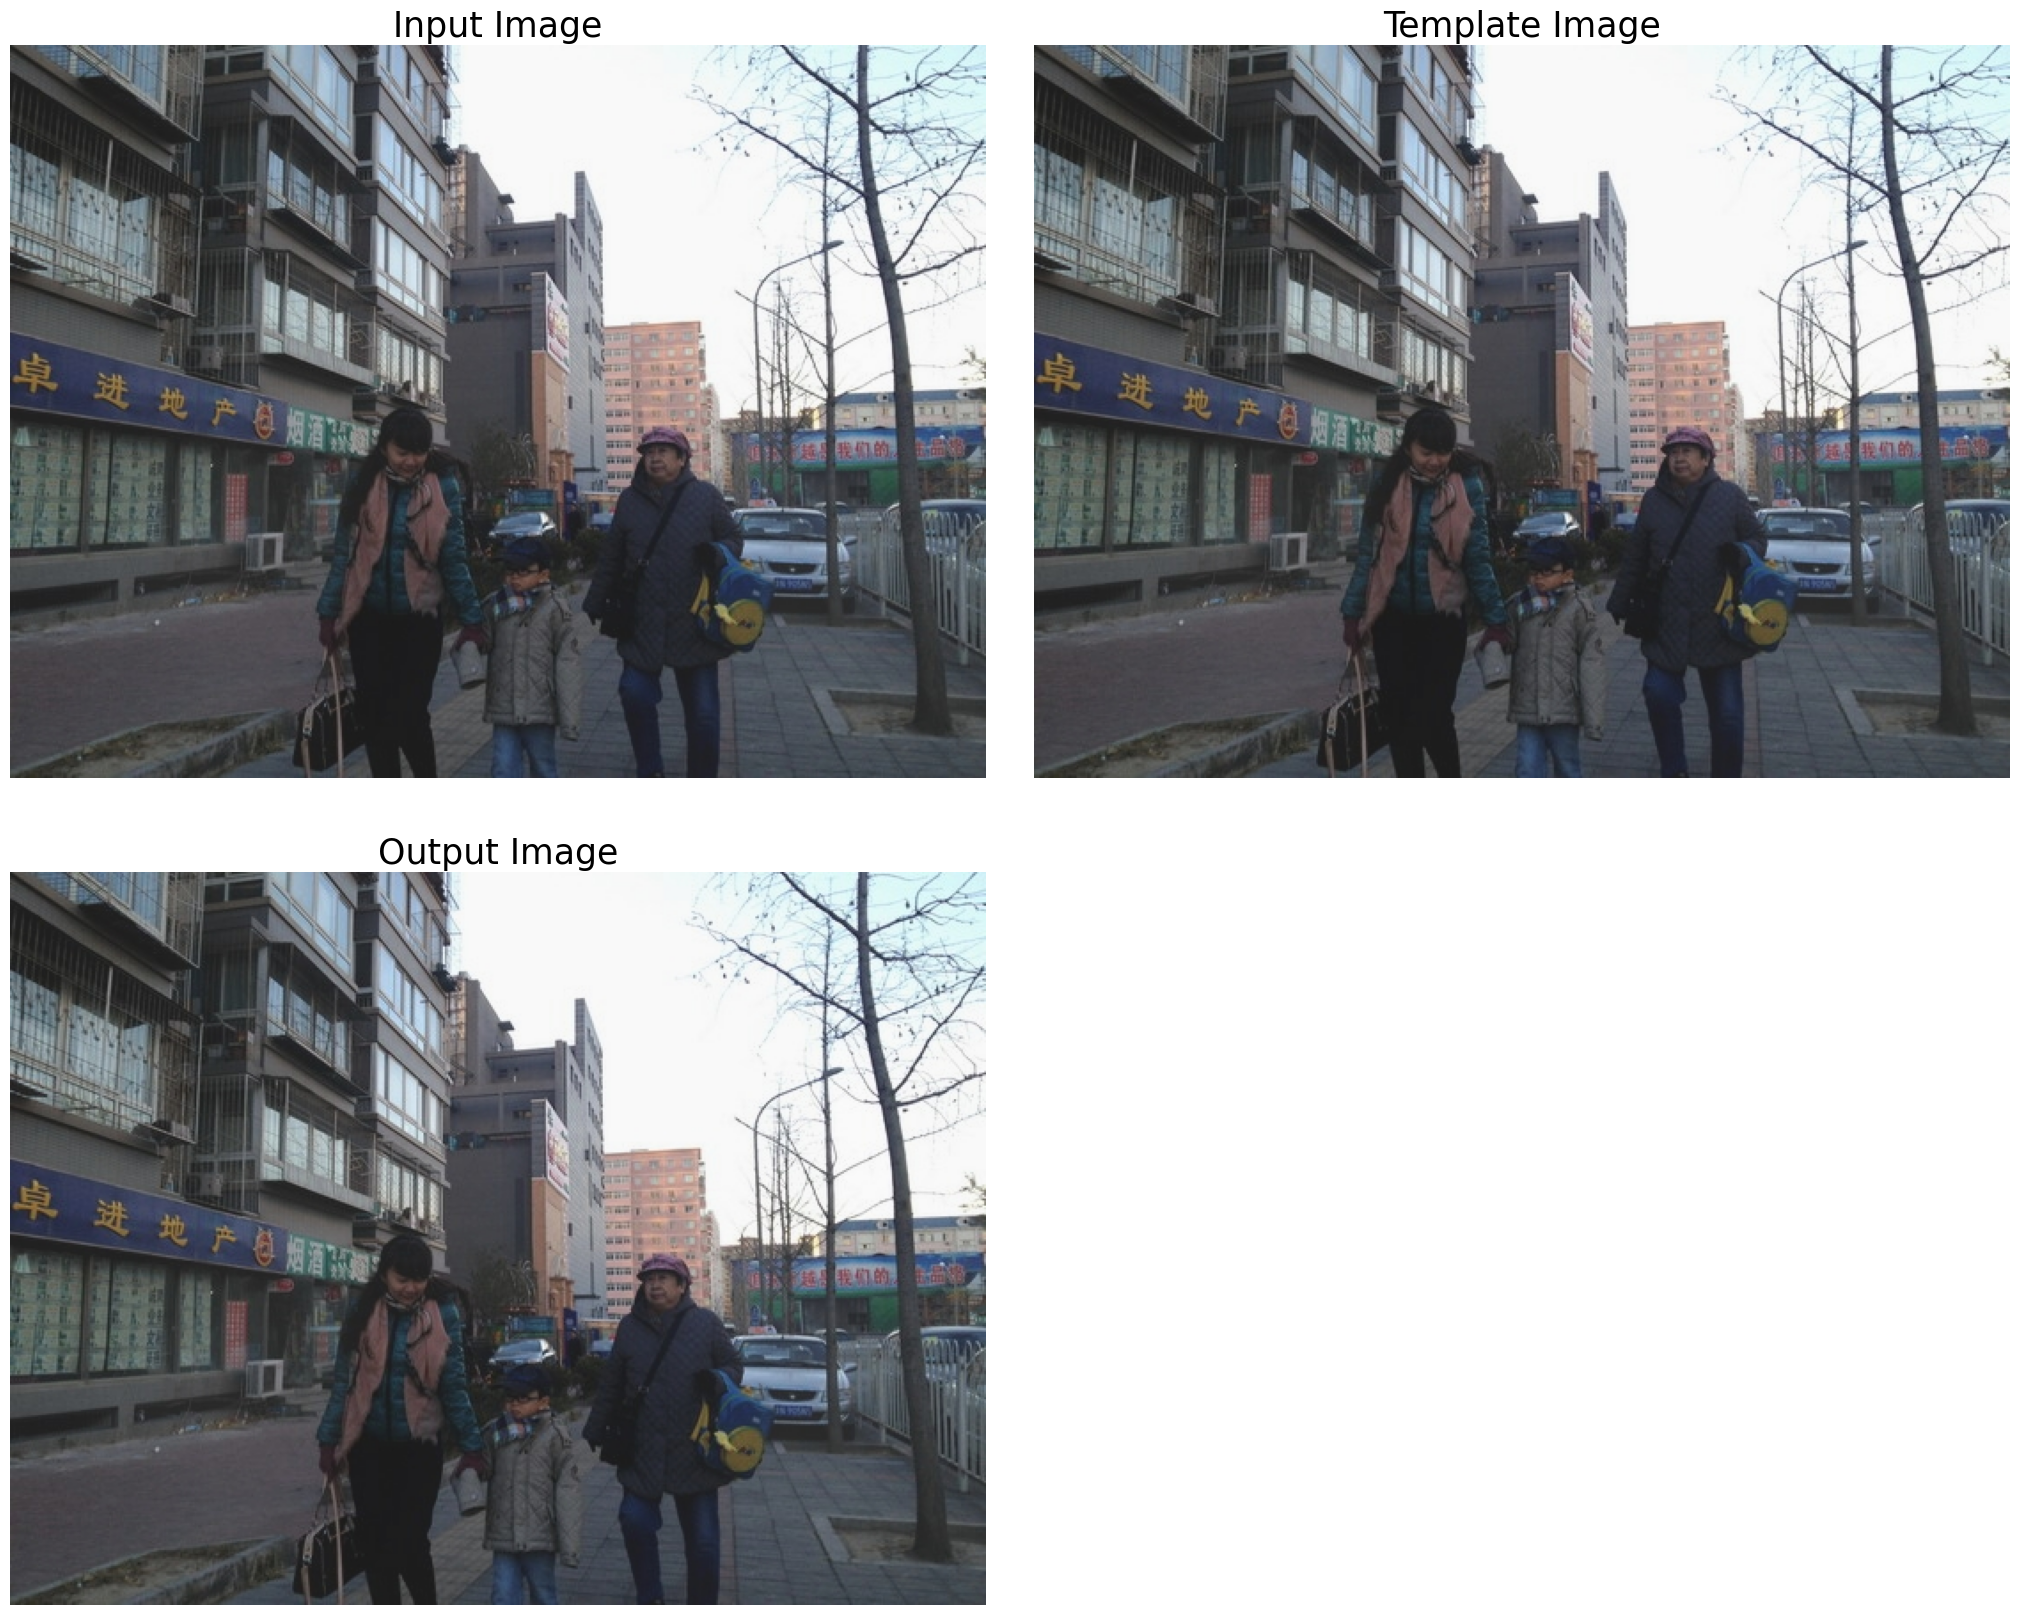

In [45]:
plt.figure(figsize=(20,17))
plt.subplots_adjust(left=0, top=0.95, right=1, bottom=0, wspace=0.05, hspace=0.05)
plt.subplot(221), plt.imshow(img1), plt.axis('off'), plt.title('Input Image', size=25)
plt.subplot(222), plt.imshow(img2), plt.axis('off'), plt.title('Template Image', size=25)
plt.subplot(223), plt.imshow(imga[...,:3]), plt.axis('off'), plt.title('Output Image', size=25)
plt.show()

In [46]:
img = ReadImage(haze_file_names_with_path_image_list[rnd_value],sitkInt8) 
img = Cast(img, sitkFloat64)

In [47]:
lower_th = 10

In [48]:
upper_th = 20

In [49]:
edges1 = CannyEdgeDetection(img, lowerThreshold=lower_th, upperThreshold=upper_th, variance=[1, 1])

In [50]:
edges2 = CannyEdgeDetection(img, lowerThreshold=lower_th, upperThreshold=upper_th, variance=[3, 3])

In [51]:
edges3 = CannyEdgeDetection(img, lowerThreshold=lower_th, upperThreshold=upper_th, variance=[6, 6])

In [52]:
image = GetArrayFromImage(img)

In [53]:
edges1 = GetArrayFromImage(edges1)

In [54]:
edges2 = GetArrayFromImage(edges2)

In [55]:
edges3 = GetArrayFromImage(edges3)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vxams\AppData\Local\Temp\ipykernel_7724\780602976.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.subplot(222), plt.imshow(edges1, cmap=plt.cm.gray), plt.axis('off'), plt.title('Canny filter, $\sigma=1$', fontsize=20)
C:\Users\vxams\AppData\Local\Temp\ipykernel_7724\780602976.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.subplot(223), plt.imshow(edges2, cmap=plt.cm.gray), plt.axis('off'), plt.title('Canny filter, $\sigma=3$', fontsize=20)
C:\Users\vxams\AppData\Local\Temp\ipykernel_7724\780602976.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.subplot(224), plt.imshow(edges3, cmap=plt.cm.gray), plt.axis('off'), plt.title('Canny filter, $\sigma=6$', fontsize

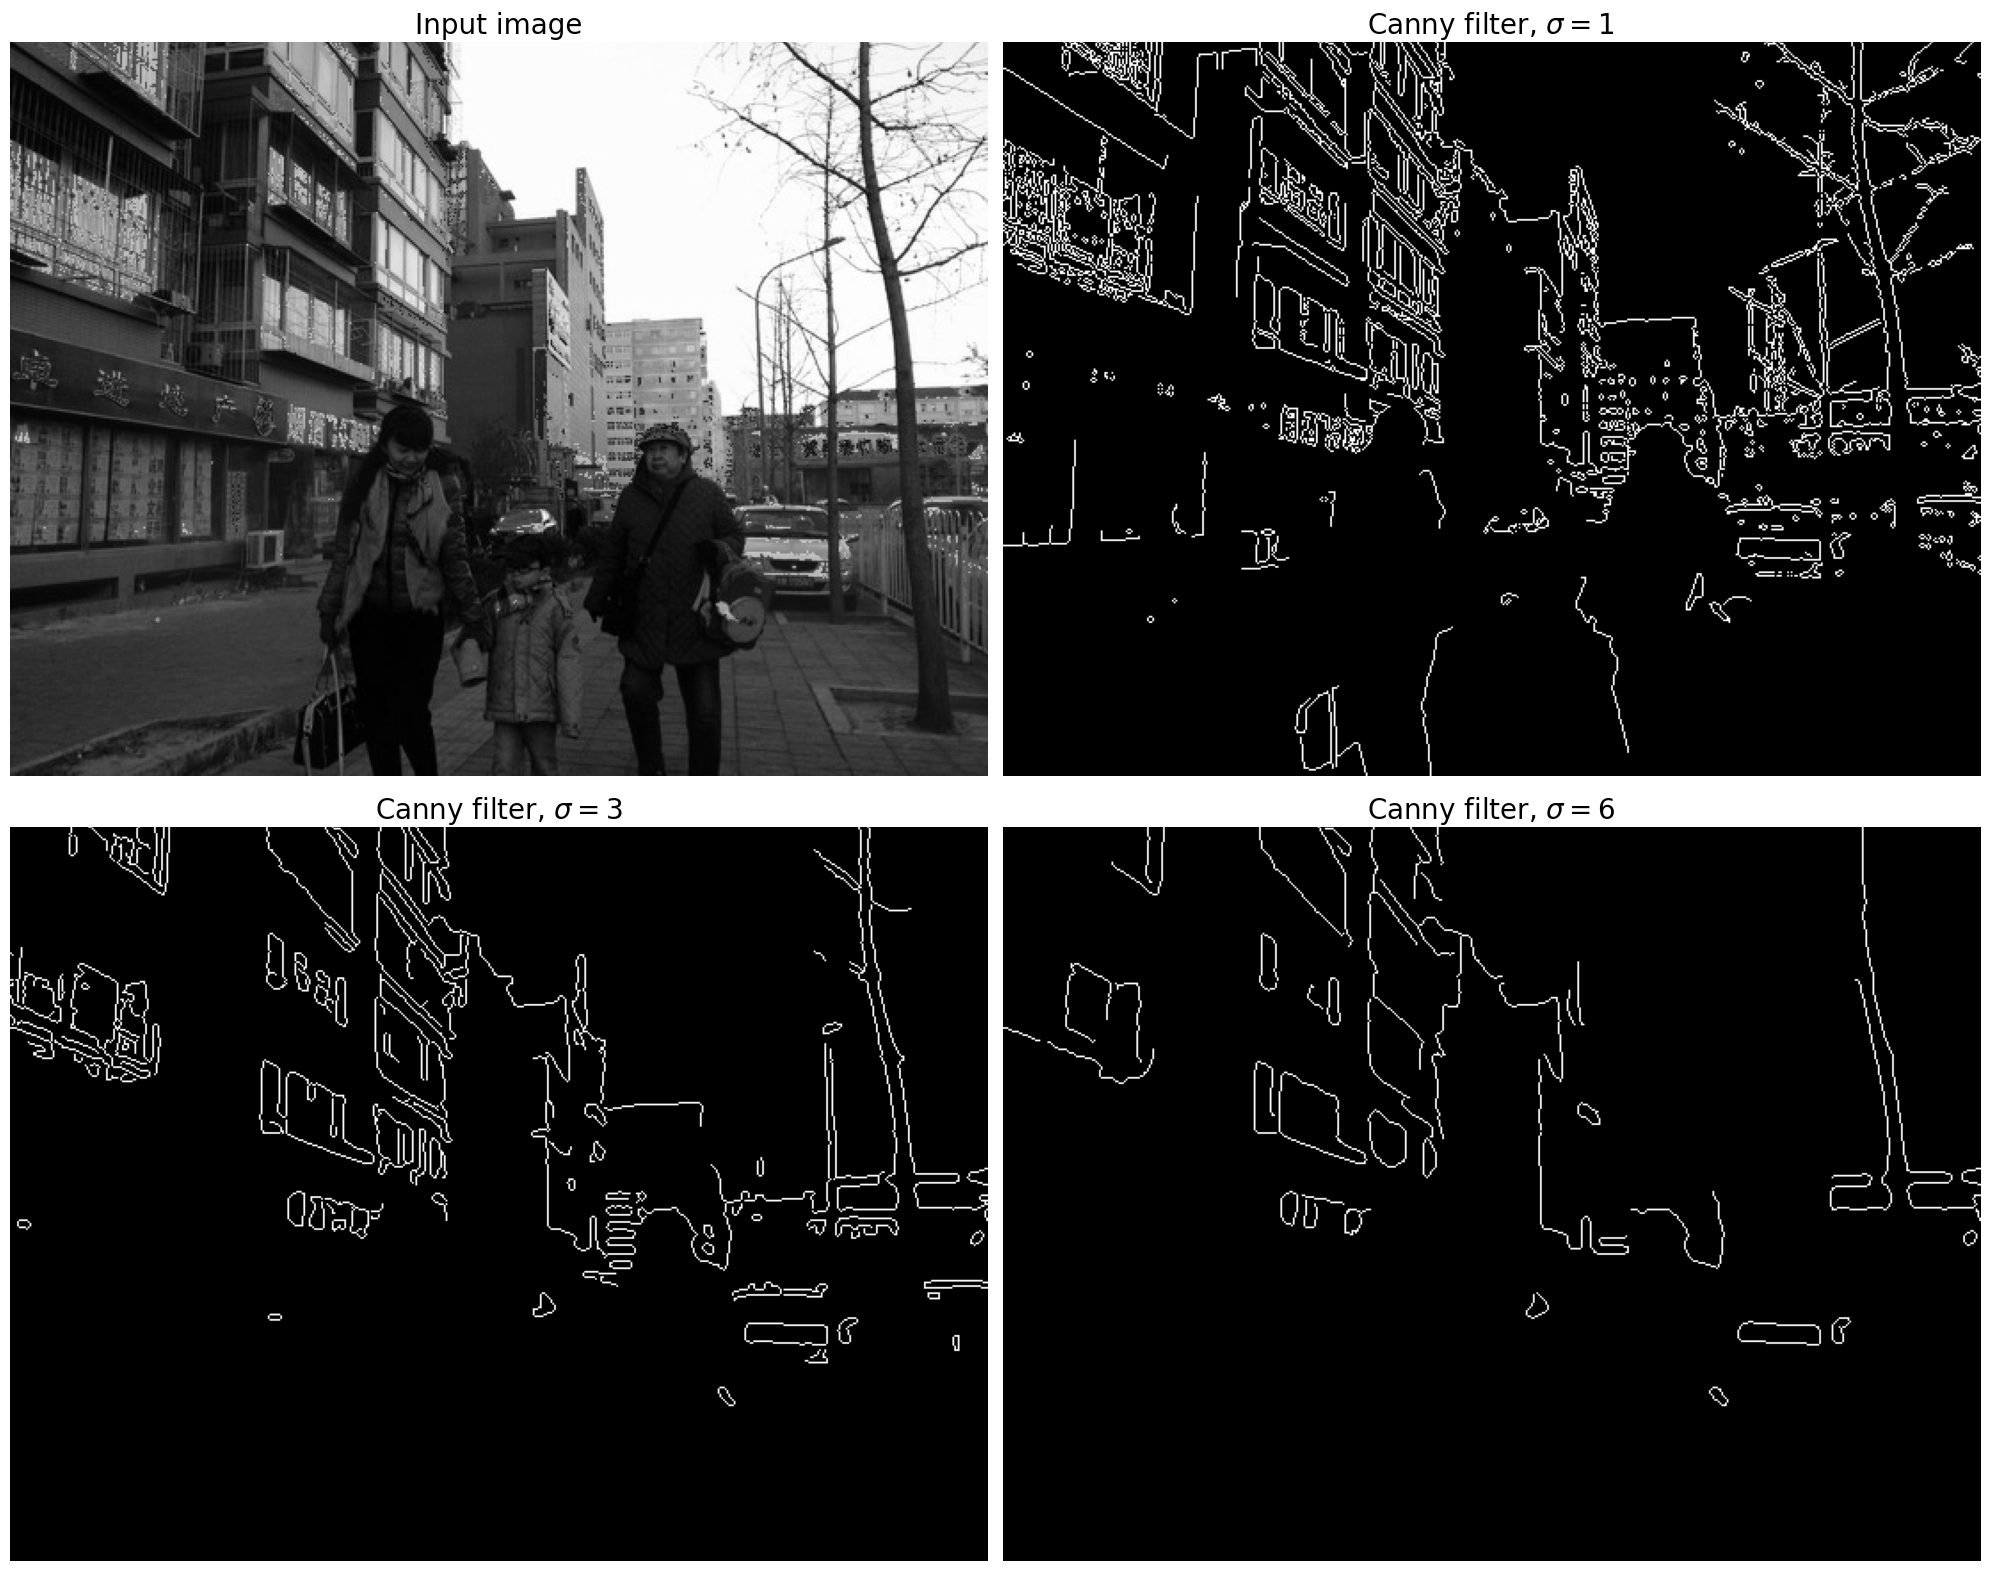

In [56]:
fig = plt.figure(figsize=(20, 16))

plt.subplot(221), plt.imshow(image.astype(np.uint8), cmap=plt.cm.gray), plt.axis('off'), plt.title('Input image', fontsize=20)
plt.subplot(222), plt.imshow(edges1, cmap=plt.cm.gray), plt.axis('off'), plt.title('Canny filter, $\sigma=1$', fontsize=20)
plt.subplot(223), plt.imshow(edges2, cmap=plt.cm.gray), plt.axis('off'), plt.title('Canny filter, $\sigma=3$', fontsize=20)
plt.subplot(224), plt.imshow(edges3, cmap=plt.cm.gray), plt.axis('off'), plt.title('Canny filter, $\sigma=6$', fontsize=20)
fig.tight_layout()

plt.show()

In [57]:
img_a = np.mean(imread(haze_file_names_with_path_image_list[rnd_value]), axis=2)

In [58]:
gauss_kernel = np.outer(signal.gaussian(img_a.shape[0], 5), signal.gaussian(img_a.shape[1], 5))

C:\Users\vxams\AppData\Local\Temp\ipykernel_7724\886501261.py:1: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_kernel = np.outer(signal.gaussian(img_a.shape[0], 5), signal.gaussian(img_a.shape[1], 5))


In [59]:
freq = fftp.fft2(img_a)

In [60]:
freq_kernel = fftp.fft2(fftp.ifftshift(gauss_kernel))

In [61]:
convolved = freq*freq_kernel

In [62]:
im1 = fftp.ifft2(convolved).real

In [63]:
output_img = (20*np.log10( 0.1 + fftp.fftshift(freq))).astype(int)

C:\Users\vxams\AppData\Local\Temp\ipykernel_7724\2426758915.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  output_img = (20*np.log10( 0.1 + fftp.fftshift(freq))).astype(int)


In [64]:
original_spectrum = (20*np.log10( 0.1 + fftp.fftshift(freq_kernel))).astype(int)

C:\Users\vxams\AppData\Local\Temp\ipykernel_7724\2501933631.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  original_spectrum = (20*np.log10( 0.1 + fftp.fftshift(freq_kernel))).astype(int)


In [65]:
gaussian_kernel = (20*np.log10( 0.1 + fftp.fftshift(convolved))).astype(int)

C:\Users\vxams\AppData\Local\Temp\ipykernel_7724\2120762588.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  gaussian_kernel = (20*np.log10( 0.1 + fftp.fftshift(convolved))).astype(int)


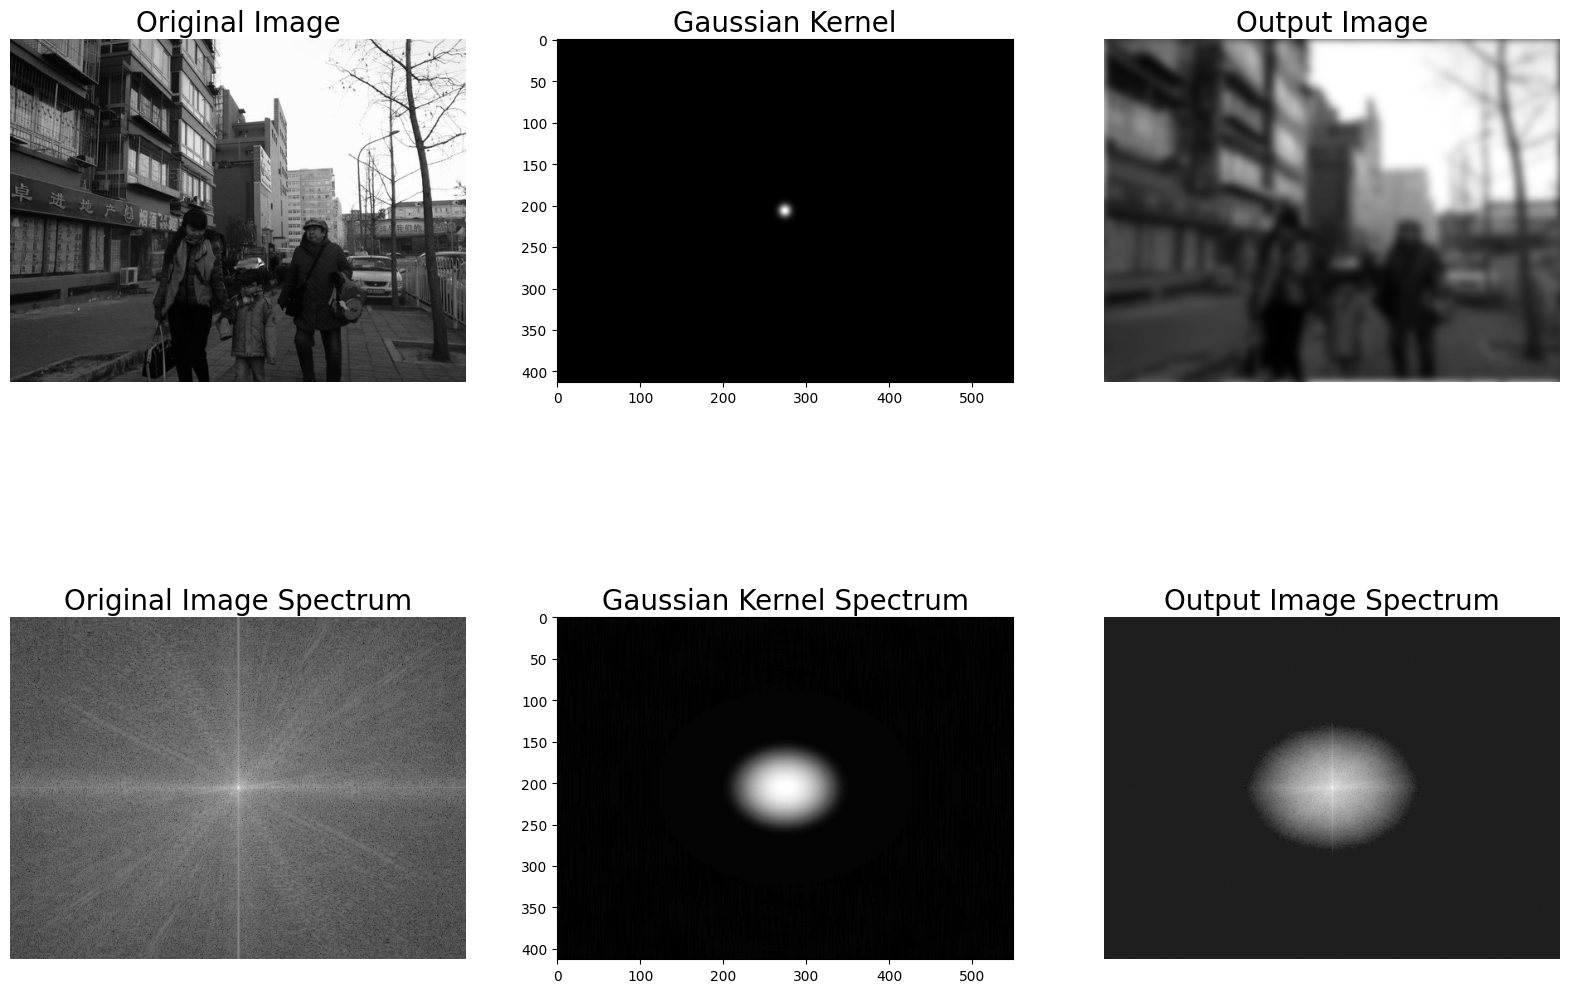

In [66]:
plt.figure(figsize=(20,15))
plt.gray()
plt.subplot(2,3,1), plt.imshow(img_a), plt.title('Original Image', size=20), plt.axis('off')
plt.subplot(2,3,2), plt.imshow(gauss_kernel), plt.title('Gaussian Kernel', size=20)
plt.subplot(2,3,3), plt.imshow(im1) 
plt.title('Output Image', size=20), plt.axis('off')
plt.subplot(2,3,4), plt.imshow( output_img)
plt.title('Original Image Spectrum', size=20), plt.axis('off')
plt.subplot(2,3,5), plt.imshow(original_spectrum )
plt.title('Gaussian Kernel Spectrum', size=20), plt.subplot(2,3,6)
plt.imshow( gaussian_kernel)
plt.title('Output Image Spectrum', size=20), plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0)
plt.show()

In [67]:
img_a = rgb2gray(imread(haze_file_names_with_path_image_list[rnd_value]))
gauss_kernel = np.outer(signal.gaussian(img_a.shape[0], 1), signal.gaussian(img_a.shape[1], 1))
freq = fftp.fft2(img_a)
freq_kernel = fftp.fft2(fftp.ifftshift(gauss_kernel))

C:\Users\vxams\AppData\Local\Temp\ipykernel_7724\3912509347.py:2: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_kernel = np.outer(signal.gaussian(img_a.shape[0], 1), signal.gaussian(img_a.shape[1], 1))


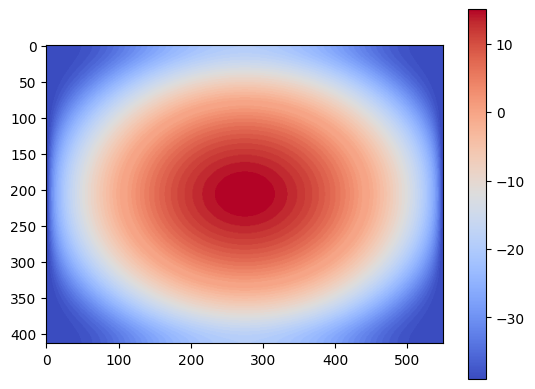

In [68]:
plt.imshow( (20*np.log10( 0.01 + fftp.fftshift(freq_kernel))).real.astype(int), cmap='coolwarm') 
plt.colorbar()
plt.show()


In [69]:
def load_image(img_path):
    img = read_file(img_path) 
    img = decode_jpeg(img, channels = 3)
    img = resize(img, size = (384, 384), antialias = True)
    img = img / 255.0
    return img

In [70]:
def get_train_validation_images():
    orig_img_path = "Dataset/De-hazed"
    hazy_img_path = "Dataset/Haze"
    train_img = []
    val_img = []

    orig_img = glob(orig_img_path + '/*.jpg')
    n = len(orig_img)
    np.random.shuffle(orig_img)
    train_keys = orig_img[:int(0.9*n)]        
    val_keys = orig_img[int(0.9*n):]
    
    split_dict = {}
    for key in train_keys:
        split_dict[key] = 'train'
    for key in val_keys:
        split_dict[key] = 'val'

    print(split_dict)
    hazy_img = glob(hazy_img_path + '/*.jpg')
    for img in hazy_img:
        img_name = img.split('\\')[-1]
        print(img_name)
        orig_path = orig_img_path + '\\' + img_name.split('_')[0] + '.jpg'
        print(orig_path)
        if (split_dict[orig_path] == 'train'):
            train_img.append([img, orig_path])  
        else:
            val_img.append([img, orig_path])
            
    return train_img, val_img

In [71]:
train_data, val_data = get_train_validation_images()

{'Dataset/De-hazed\\0502.jpg': 'train', 'Dataset/De-hazed\\0780.jpg': 'train', 'Dataset/De-hazed\\0624.jpg': 'train', 'Dataset/De-hazed\\0344.jpg': 'train', 'Dataset/De-hazed\\0349.jpg': 'train', 'Dataset/De-hazed\\0056.jpg': 'train', 'Dataset/De-hazed\\0036.jpg': 'train', 'Dataset/De-hazed\\0141.jpg': 'train', 'Dataset/De-hazed\\0794.jpg': 'train', 'Dataset/De-hazed\\0523.jpg': 'train', 'Dataset/De-hazed\\0632.jpg': 'train', 'Dataset/De-hazed\\0531.jpg': 'train', 'Dataset/De-hazed\\0757.jpg': 'train', 'Dataset/De-hazed\\0215.jpg': 'train', 'Dataset/De-hazed\\0665.jpg': 'train', 'Dataset/De-hazed\\0225.jpg': 'train', 'Dataset/De-hazed\\0813.jpg': 'train', 'Dataset/De-hazed\\0377.jpg': 'train', 'Dataset/De-hazed\\0559.jpg': 'train', 'Dataset/De-hazed\\0048.jpg': 'train', 'Dataset/De-hazed\\0811.jpg': 'train', 'Dataset/De-hazed\\0421.jpg': 'train', 'Dataset/De-hazed\\0775.jpg': 'train', 'Dataset/De-hazed\\0316.jpg': 'train', 'Dataset/De-hazed\\0833.jpg': 'train', 'Dataset/De-hazed\\0634.

In [72]:
def load_data(train_data, val_data, batch_size):
    
    train_data_orig = tf.data.Dataset.from_tensor_slices([img[1] for img in train_data]).map(lambda x: load_image(x))
    train_data_haze = tf.data.Dataset.from_tensor_slices([img[0] for img in train_data]).map(lambda x: load_image(x))
    train = tf.data.Dataset.zip((train_data_haze, train_data_orig)).shuffle(buffer_size=100, reshuffle_each_iteration=True).batch(batch_size)
    
    val_data_orig = tf.data.Dataset.from_tensor_slices([img[1] for img in val_data]).map(lambda x: load_image(x))
    val_data_haze = tf.data.Dataset.from_tensor_slices([img[0] for img in val_data]).map(lambda x: load_image(x))
    val = tf.data.Dataset.zip((val_data_haze, val_data_orig)).shuffle(buffer_size=100, reshuffle_each_iteration=True).batch(batch_size)
    
    return train, val

In [73]:
batch_size = 16

In [74]:
train, val = load_data(train_data, val_data, batch_size)

In [75]:
epochs = 15

In [76]:
intializer = random_normal(stddev=0.008, seed = 101) 

In [77]:
bias_initializer = tf.constant_initializer()

In [78]:
l2_regularizer = L2(1e-4)

In [79]:
optimizer = Adam(learning_rate = 1e-4)

In [80]:
def get_model():
    
    inputs = tf.keras.Input(shape = [384, 384, 3])     
        
    conv = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                  bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(inputs)
    conv = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                  bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv)
    
    conv_up = Conv2D(filters = 128, kernel_size = 3, strides = 2, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv)
    conv_up = Conv2D(filters = 128, kernel_size = 3, strides = 2, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv_up)

    conv1_1 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                   bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv_up)
    conv1_2 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv1_1)
    conv1_3 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = tf.keras.initializers.glorot_normal(seed = 101),
                   bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv1_2)
    conc1 = tf.add(conv1_3, conv1_1)
    conv1 = tf.keras.activations.relu(conc1)

    conv2_1 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv1)
    conv2_2 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv2_1)
    conv2_3 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = tf.keras.initializers.glorot_normal(seed = 101),
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv2_2)
    conc2 = tf.add(conv2_3, conv2_1)
    conv2 = tf.keras.activations.relu(conc2)

    conv3_1 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv2)
    conv3_2 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv3_1)
    conv3_3 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv3_2)
    conv3_4 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv3_3)
    conv3_5 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = tf.keras.initializers.glorot_normal(seed = 101),
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv3_4)
    conc3 = tf.add(conv3_5, conv3_1)
    conv3 = tf.keras.activations.relu(conc3)

    conv4_1 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv3)
    conv4_2 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv4_1)
    conv4_3 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv4_2)
    conv4_4 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv4_3)
    conv4_5 = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = tf.keras.initializers.glorot_normal(seed = 101),
                     bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv4_4)
    conc4 = tf.add(conv4_5, conv4_1)
    conv4 = tf.keras.activations.relu(conc4)

    deconv = Conv2DTranspose(filters = 64, kernel_size = 3, strides = 2, padding = 'same', kernel_initializer = tf.keras.initializers.glorot_normal(seed = 101),
                             kernel_regularizer = l2_regularizer)(conv4)
    deconv = Conv2DTranspose(filters = 64, kernel_size = 3, strides = 2, padding = 'same', kernel_initializer = tf.keras.initializers.glorot_normal(seed = 101),
                             kernel_regularizer = l2_regularizer)(deconv)

    conv = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                  bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(deconv)
    conv = Conv2D(filters = 3, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = tf.keras.initializers.glorot_normal(seed = 101),
                  bias_initializer = bias_initializer, kernel_regularizer = l2_regularizer)(conv)
    conc = tf.add(conv, inputs)
    gman_output = tf.keras.activations.relu(conc)
    
    conv = Conv2D(filters = 64, kernel_size = 3, dilation_rate = 4, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                 kernel_regularizer = l2_regularizer)(inputs)
    conv = Conv2D(filters = 64, kernel_size = 3, dilation_rate = 2, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                 kernel_regularizer = l2_regularizer)(conv)
    conv = Conv2D(filters = 64, kernel_size = 3, dilation_rate = 2, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                 kernel_regularizer = l2_regularizer)(conv)
    conv = Conv2D(filters = 64, kernel_size = 3, dilation_rate = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                 kernel_regularizer = l2_regularizer)(conv)
    conv = Conv2D(filters = 64, kernel_size = 3, dilation_rate = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                 kernel_regularizer = l2_regularizer)(conv)
    conv = Conv2D(filters = 64, kernel_size = 3, dilation_rate = 1, padding = 'same', kernel_initializer = intializer, activation = 'relu',
                 kernel_regularizer = l2_regularizer)(conv)
    deconv = Conv2DTranspose(filters = 64, kernel_size = 3, dilation_rate = 4, padding = 'same', kernel_initializer = tf.keras.initializers.glorot_normal(seed = 101),
                           activation = 'relu', kernel_regularizer = l2_regularizer)(conv)
    conv = Conv2D(filters = 3, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = tf.keras.initializers.glorot_normal(seed = 101),
                 kernel_regularizer = l2_regularizer)(deconv)
    conc = tf.add(conv, inputs)
    pn_output = tf.keras.activations.relu(conc)
    
    output = tf.add(gman_output, pn_output)
    
    return Model(inputs = inputs, outputs = output)

In [83]:
model = get_model()

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [ ]:
model.summary()

In [ ]:
train_loss = MeanSquaredError(name = "train loss")

In [ ]:
val_loss = MeanSquaredError(name = "val loss")

In [ ]:
def train_dehaze_model(epochs, train, val, net, train_loss, val_loss, optimizer):
    
    for epoch in range(epochs):
        
        print("\nStart of epoch %d" % (epoch,), end=' ')
        start_time_epoch = time.time()
        start_time_step = time.time()
        
        for step, (train_batch_haze, train_batch_orig) in enumerate(train):

            with tf.GradientTape() as tape:

                train_logits = net(train_batch_haze, training = True)
                loss = mean_squared_error(train_batch_orig, train_logits)

            grads = tape.gradient(loss, net.trainable_weights)
            optimizer.apply_gradients(zip(grads, net.trainable_weights))

            train_loss.update_state(train_batch_orig, train_logits)
            if step == 0:
                print('[', end='')
            if step % 64 == 0:
                print('=', end='')
        
        print(']', end='')
        print('  -  ', end='')
        print('Training Loss: %.4f' % (train_loss.result()), end='')
        
        
        for step, (val_batch_haze, val_batch_orig) in enumerate(val):
            val_logits = net(val_batch_haze, training = False)
            val_loss.update_state(val_batch_orig, val_logits)
            
            if step % 32 ==0:
                display_img(net, val_batch_haze, val_batch_orig)
        
        print('  -  ', end='')
        print('Validation Loss: %.4f' % (val_loss.result()), end='')
        print('  -  ', end=' ')
        print("Time taken: %.2fs" % (time.time() - start_time_epoch))
        
        net.save('dehazed_model')           
        train_loss.reset_states()
        val_loss.reset_states()


In [ ]:
%%time
train_dehaze_model(epochs, train, val, model, train_loss, val_loss, optimizer)

In [ ]:
def my_prediction(net, test_img_path):
    
    test_img = glob(test_img_path + '/*.jpg')
    random.shuffle(test_img)
    
    for img in test_img:
        
        img = tf.io.read_file(img)
        img = tf.io.decode_jpeg(img, channels = 3)
        
        if img.shape[1] > img.shape[0]:
            img = tf.image.resize(img, size = (1080, 1920), antialias = True)
        if img.shape[1] < img.shape[0]:
            img = tf.image.resize(img, size = (1920, 1080), antialias = True)
        
        img = img / 255
        img = tf.expand_dims(img, axis = 0)      
        
        dehaze = net(img, training = False)
        
        plt.figure(figsize = (80, 80))
        
        display_list = [img[0], dehaze[0]]       
        title = ['Hazy Image', 'Dehazed Image']

        for i in range(2):
            plt.subplot(1, 2, i+1)
            plt.title(title[i], fontsize = 65, y = 1.045)
            plt.imshow(display_list[i])
            plt.axis('off')
        
        plt.show()

In [ ]:
my_prediction(model, 'Dataset/test')